In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('coffee_quality.csv')

In [13]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             207 non-null    int64   
 1   ID                     207 non-null    int64   
 2   Country of Origin      207 non-null    object  
 3   Farm Name              205 non-null    object  
 4   Lot Number             206 non-null    object  
 5   Mill                   204 non-null    object  
 6   ICO Number             75 non-null     object  
 7   Company                207 non-null    object  
 8   Altitude               206 non-null    object  
 9   Region                 205 non-null    object  
 10  Producer               206 non-null    object  
 11  Number of Bags         207 non-null    int64   
 12  Bag Weight             207 non-null    object  
 13  In-Country Partner     207 non-null    object  
 14  Harvest Year           207 non-null    obj

In [7]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


In [10]:
df['quality_tier'] = pd.qcut(df['Overall'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])


In [11]:
df['aroma_flavor_ratio'] = df['Aroma'] / (df['Flavor'] + 1e-6)  


Questions Answered:

What are the main countries of origin represented in the coffee quality dataset?
Taiwan, Guatemala, Colombia, Honduras, Thailand, and others.

What are the popular coffee varieties documented?
Gesha, Caturra, Typica, Bourbon, and Catuai.

Which processing methods are most commonly used?
Washed / Wet is the most common, followed by Natural / Dry and Pulped natural / honey.

What are the average sensory attribute scores for coffee quality?
Scores range from about 7.6 to 7.74 for attributes like Aroma, Flavor, Aftertaste, Acidity, Body, Balance, with overall average close to 7.67.

How do sensory attributes correlate with overall coffee quality?
Strong positive correlations exist between Flavor, Aftertaste, Balance and the Overall score, indicating these most affect perceived quality.

What is the distribution of total cup points and coffee quality range?
Coffee cup points range roughly from 78 to 89, indicating varying quality from lower specialty grade to higher specialty grade.

In [15]:
import os


os.makedirs("screenshots", exist_ok=True)

plt.savefig("screenshots/missing_data_heatmap.png")


<Figure size 640x480 with 0 Axes>

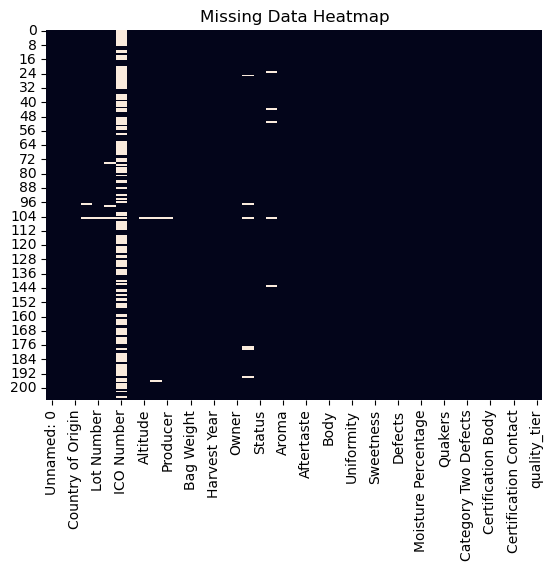

In [16]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.savefig("screenshots/missing_data_heatmap.png")
plt.show()

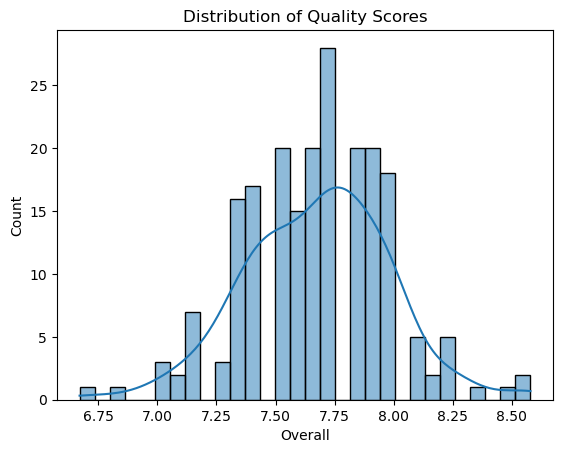

In [17]:
sns.histplot(df['Overall'], bins=30, kde=True)
plt.title("Distribution of Quality Scores")
plt.savefig("screenshots/quality_score_dist.png")
plt.show()

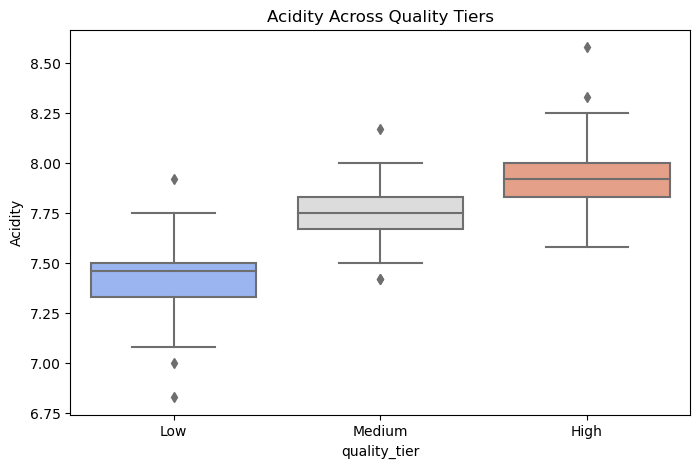

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality_tier', y='Acidity', data=df, palette='coolwarm')
plt.title('Acidity Across Quality Tiers')
plt.savefig("screenshots/boxplot_acidity_quality.png")
plt.show()

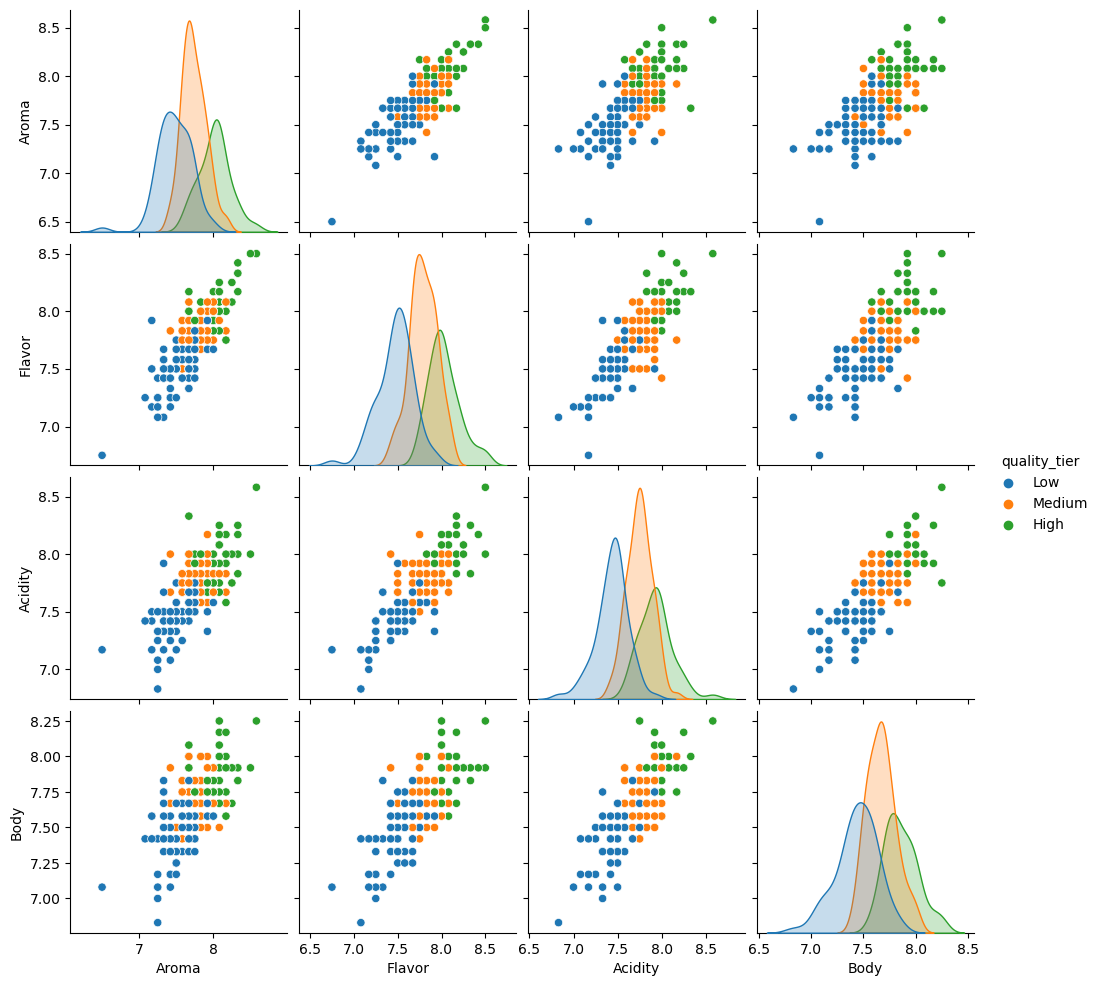

In [19]:
sns.pairplot(df, vars=['Aroma', 'Flavor', 'Acidity', 'Body'], hue='quality_tier')
plt.savefig("screenshots/pairplot_quality_tiers.png")
plt.show()

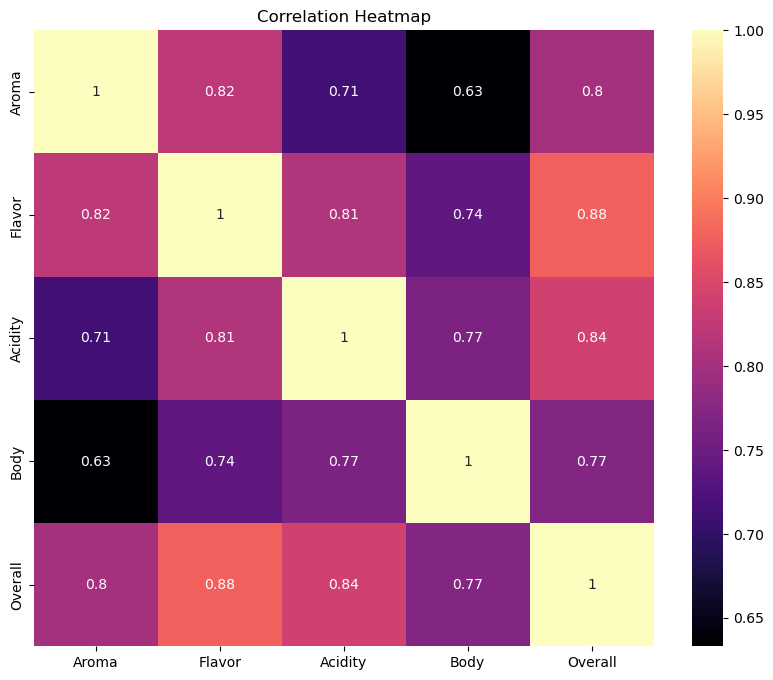

In [20]:
plt.figure(figsize=(10,8))
corr = df[['Aroma', 'Flavor', 'Acidity', 'Body', 'Overall']].corr()
sns.heatmap(corr, annot=True, cmap='magma')
plt.title("Correlation Heatmap")
plt.savefig("screenshots/correlation_heatmap.png")
plt.show()

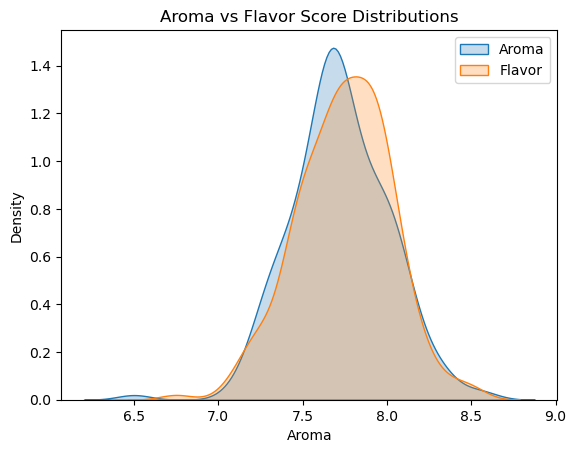

In [25]:
sns.kdeplot(df['Aroma'], fill=True, label='Aroma')
sns.kdeplot(df['Flavor'], fill=True, label='Flavor')
plt.title("Aroma vs Flavor Score Distributions")
plt.legend()
plt.savefig("screenshots/kde_aroma_flavor.png")
plt.show()

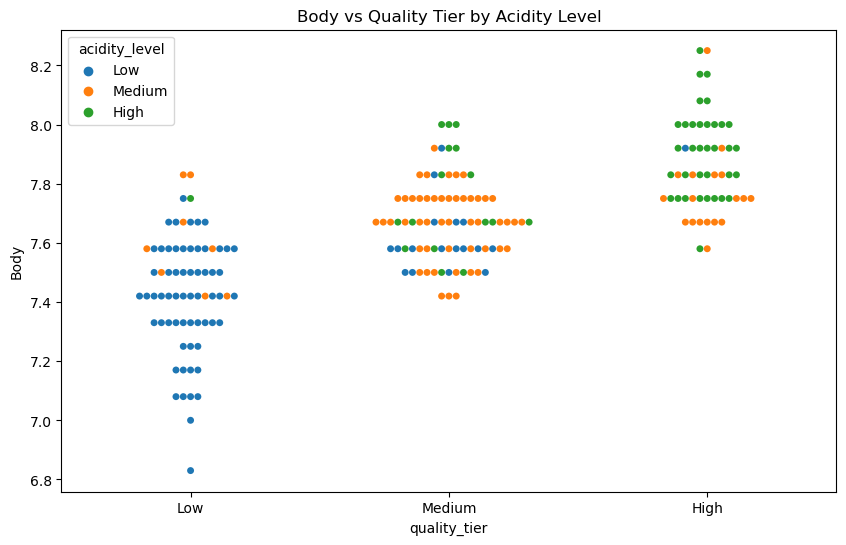

In [22]:
df['acidity_level'] = pd.qcut(df['Acidity'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10,6))
sns.swarmplot(x='quality_tier', y='Body', hue='acidity_level', data=df)
plt.title('Body vs Quality Tier by Acidity Level')
plt.savefig("screenshots/swarm_body_quality_acidity.png")
plt.show()

In [24]:
outliers = df[(df['quality_tier'] == 'High') & (df['aroma_flavor_ratio'] < 0.9)]
print("Outliers with high quality but low aroma-to-flavor ratio:")
print(outliers[['Overall', 'aroma_flavor_ratio', 'Aroma', 'Flavor']])

Outliers with high quality but low aroma-to-flavor ratio:
Empty DataFrame
Columns: [Overall, aroma_flavor_ratio, Aroma, Flavor]
Index: []


Insights

The dataset comprises 207 coffee samples from 22 distinct countries, with Taiwan, Guatemala, and Colombia being the top contributors in sample count.

The most common coffee varieties in the dataset are Gesha and Caturra, followed by Typica, Bourbon, and Catuai.

The dominant processing method is "Washed / Wet," accounting for 124 samples, followed by "Natural / Dry" and "Pulped natural / honey."

Average sensory scores for key attributes such as Aroma (7.72), Flavor (7.74), Aftertaste (7.6), Acidity (7.69), Body (7.64), Balance (7.64), and Overall (7.67) indicate generally good quality but with some variability.

Uniformity, Clean Cup, and Sweetness attributes scored very high on average, near perfect (close to 10), showing consistency in these aspects.

Significant positive correlations exist among most sensory attributes, notably Flavor and Overall score (0.88), Aftertaste and Flavor (0.88), and Balance and Overall (0.88), suggesting these contribute strongly to perceived overall coffee quality.

Taste attributes such as Uniformity show little to no correlation with other attributes, indicating it might represent an independent quality dimension.

Total cup points for the coffees vary widely from about 78 to 89 points, reflecting a range of quality levels in the dataset.